In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('smoking_health_data_final.csv')
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [3]:
df.shape

(3900, 7)

In [4]:
df.dtypes

age                 int64
sex                object
current_smoker     object
heart_rate          int64
blood_pressure     object
cigs_per_day      float64
chol              float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3900.0,49.537949,8.559275,32.0,42.0,49.0,56.0,70.0
heart_rate,3900.0,75.688974,12.015376,44.0,68.0,75.0,82.0,143.0
cigs_per_day,3886.0,9.168554,12.037999,0.0,0.0,0.0,20.0,70.0
chol,3893.0,236.595941,44.375365,113.0,206.0,234.0,263.0,696.0


In [8]:
#Check the number of null values
df.isna().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [9]:
df['sex'].value_counts()

sex
female    2081
male      1819
Name: count, dtype: int64

In [14]:
# Calculates the mean cholestrol for each of the gender and smoking status
df.groupby(['sex','current_smoker'])['chol'].mean()

sex     current_smoker
female  no                243.143541
        yes               234.299879
male    no                230.713080
        yes               234.662125
Name: chol, dtype: float64

In [15]:
# Correlation Analysis
correlation = df[['sex','heart_rate']].corr
correlation

<bound method DataFrame.corr of        sex  heart_rate
0     male          95
1     male          64
2     male          81
3     male          90
4     male          62
...    ...         ...
3895  male          88
3896  male          70
3897  male          70
3898  male          85
3899  male          98

[3900 rows x 2 columns]>

In [16]:
# Cross tabulation - Exploring relationships between variables
df1 = pd.crosstab(df['sex'], df['chol'])
print(df1)

chol    113.0  119.0  124.0  126.0  133.0  135.0  137.0  140.0  143.0  144.0  \
sex                                                                            
female      0      0      0      0      0      2      0      2      1      1   
male        1      1      1      1      1      0      1      0      2      1   

chol    ...  392.0  398.0  405.0  410.0  432.0  439.0  453.0  464.0  600.0  \
sex     ...                                                                  
female  ...      1      1      0      2      1      0      0      1      1   
male    ...      0      0      1      1      0      1      1      0      0   

chol    696.0  
sex            
female      0  
male        1  

[2 rows x 243 columns]


In [18]:
# total count
df.groupby('current_smoker')['current_smoker'].count()

current_smoker
no     1968
yes    1932
Name: current_smoker, dtype: int64

In [ ]:
df['cigs_per_day'].value_counts()

In [25]:
cigs_groups = pd.cut(df['cigs_per_day'], bins=[0, 10, 20, 30, 40, 50, 60, 70])
cigs_groups.value_counts()

cigs_per_day
(10, 20]    920
(0, 10]     561
(20, 30]    265
(30, 40]     99
(40, 50]     61
(50, 60]     11
(60, 70]      1
Name: count, dtype: int64

In [26]:
cigs_groups_count = cigs_groups.value_counts().sort_index()
cigs_groups_count

cigs_per_day
(0, 10]     561
(10, 20]    920
(20, 30]    265
(30, 40]     99
(40, 50]     61
(50, 60]     11
(60, 70]      1
Name: count, dtype: int64

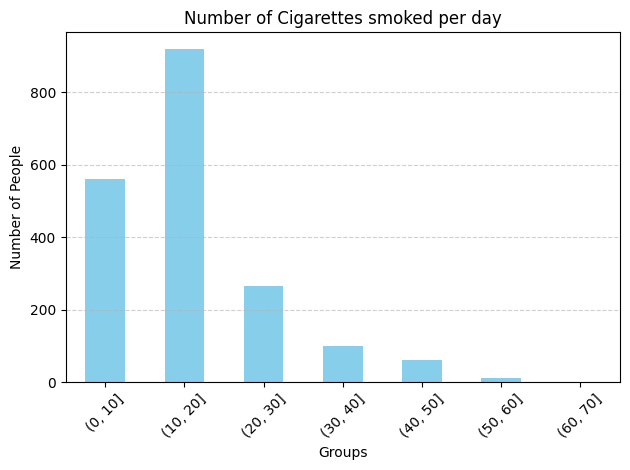

In [27]:
cigs_groups_count.plot(kind='bar', color='skyblue')
plt.title('Number of Cigarettes smoked per day')
plt.xlabel('Groups')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

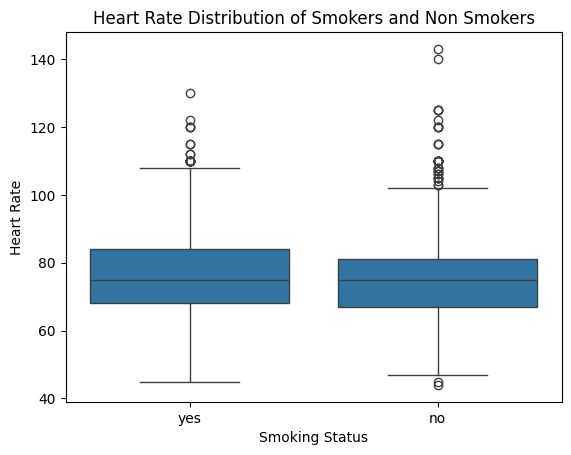

In [28]:
# Boxplot Heart Rate Distribution of Smokers and Non-Smokers
sns.boxplot(x='current_smoker', y='heart_rate', data=df)
plt.title('Heart Rate Distribution of Smokers vs Non Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Heart Rate')
plt.show()

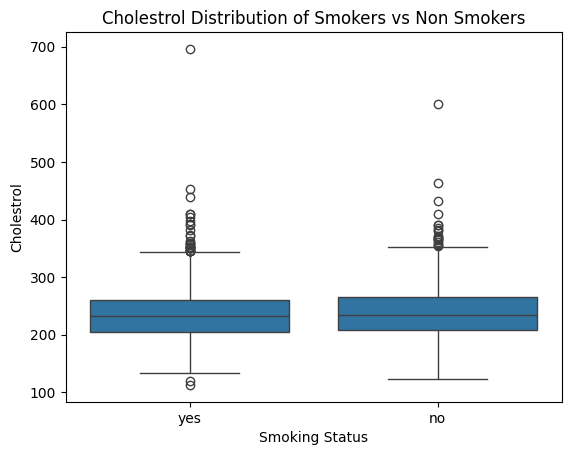

In [29]:
sns.boxplot(x='current_smoker', y='chol', data=df)
plt.title('Cholestrol Distribution of Smokers vs Non Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Cholestrol')
plt.show()

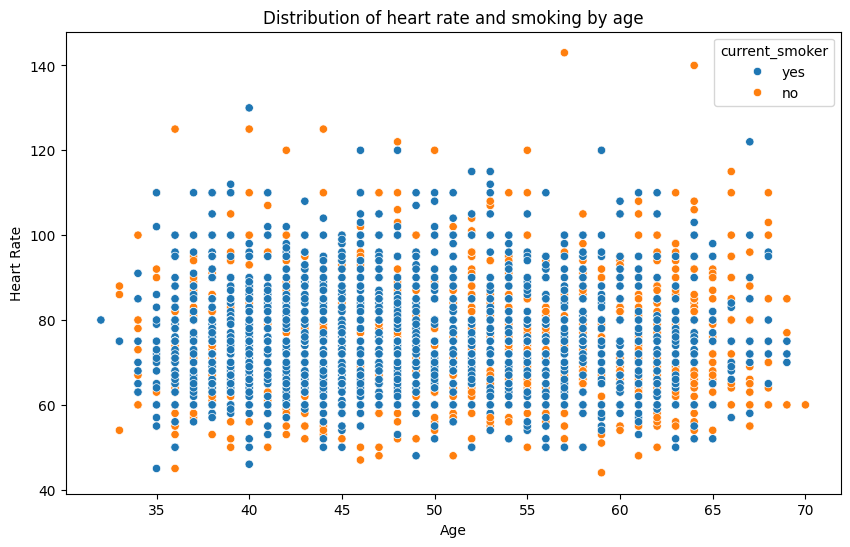

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='heart_rate', data=df, hue='current_smoker')
plt.title('Distribution of heart rate and smoking by age')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

ValueError: Could not interpret value `sys` for `y`. An entry with this name does not appear in `data`.

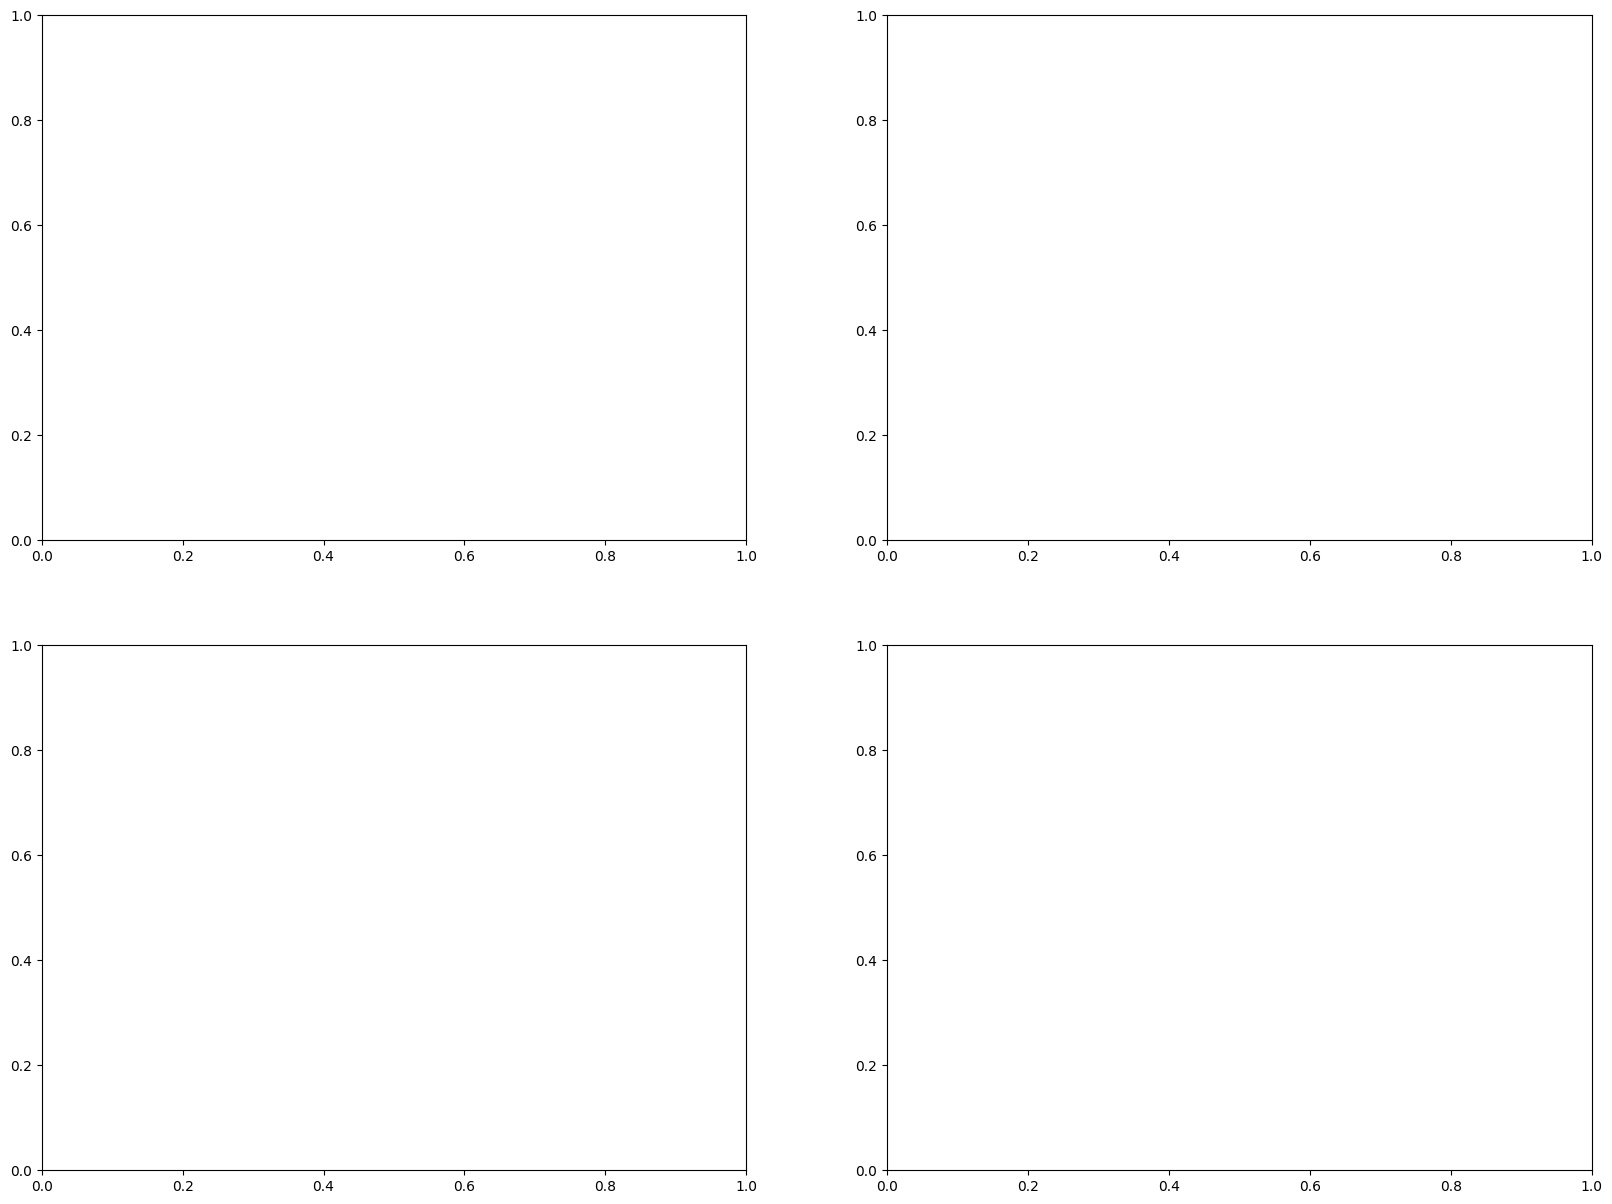

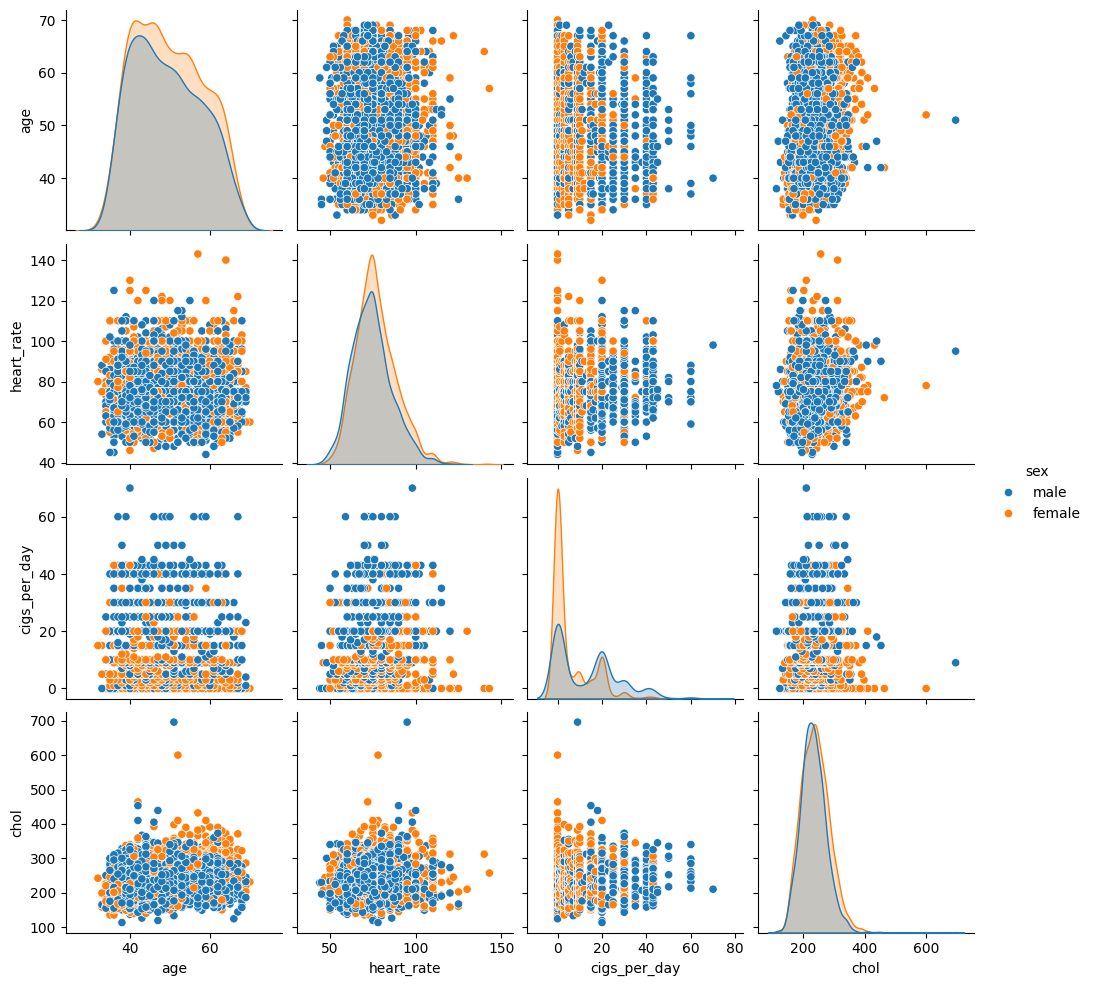

In [31]:
sns.pairplot(data= df, hue='sex')
plt.show()

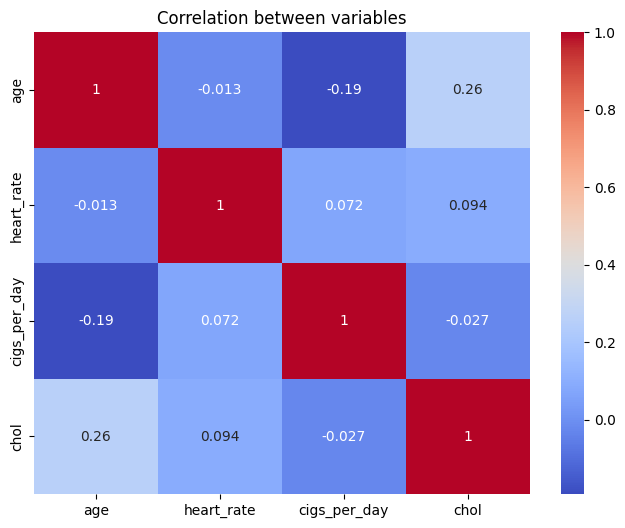

In [32]:
#Correlation between variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()